In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

In [4]:
image = cv2.imread(DATA_PATH+"images/boy.jpg")

In [6]:
scalingFactor = 1/255.0
image = np.float32(image)
image = image * scalingFactor


In [7]:
image = image * (1.0/scalingFactor)
image = np.uint8(image)

Text(0.5, 1.0, 'Normalized float to[0,1]')

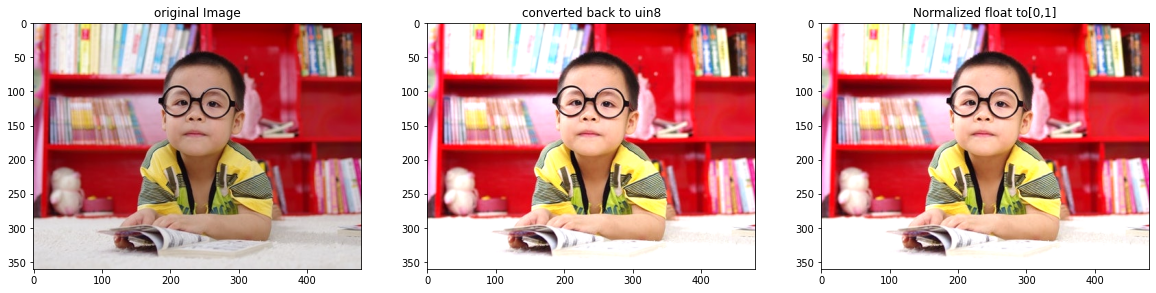

In [22]:
# Contrast

contrastPercentage = 30.0

#Multiply with scaling factor to increase contrast
contrastHigh = image * (1+contrastPercentage/100)
clippedContrastImage = np.clip(contrastHigh,0,255)
contrastHighClippedUint8 = np.uint8(clippedContrastImage)

#Conver the range to [0,1] and keep it in float number
contrastHighNormalizedFloat = (image * (1+contrastPercentage/100))/255
clippedContrastHighNormalizedFloat = np.clip(contrastHighNormalizedFloat,0,1)

# Display the outputs
plt.figure(figsize = [20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image")
plt.subplot(132);plt.imshow(contrastHighClippedUint8[...,::-1]);plt.title("converted back to uin8")
plt.subplot(133);plt.imshow(clippedContrastHighNormalizedFloat[...,::-1]);plt.title("Normalized float to[0,1]")

Text(0.5, 1.0, 'High Brightness')

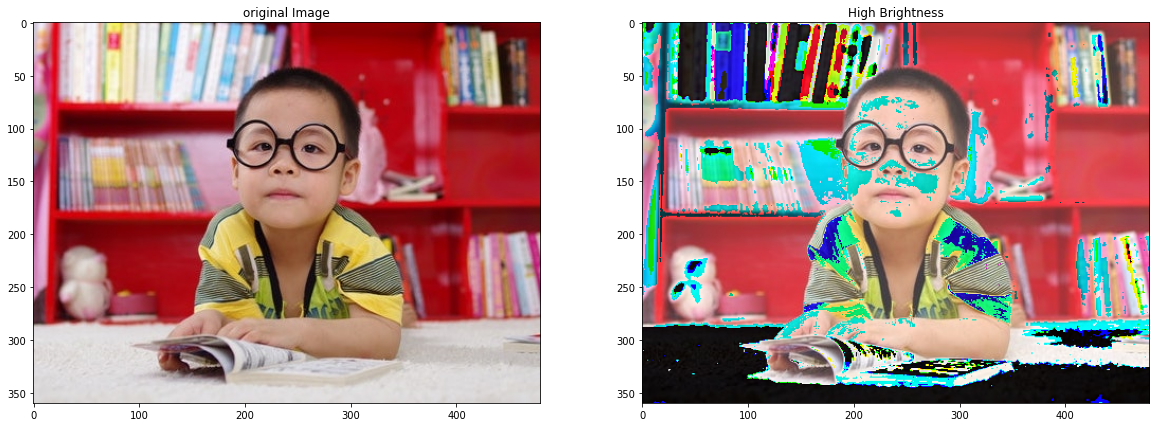

In [57]:
# Brightness
brightnessOffset = 50
brightHigh = image + brightnessOffset

plt.figure(figsize=[20,20])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("original Image")
plt.subplot(122);plt.imshow(np.clip(brightHigh,0,255)[...,::-1]);plt.title("High Brightness")

In [25]:
print("Original Image Datatype : {}".format(image.dtype))
print("Brightness Image Datatype : {}\n".format(brightHigh.dtype))

print("Original Image Highest Pixel Intensity: {}".format(image.max()))
print("Brightness Image Highest Pixel Intensity: {}".format(brightHigh.max()))

Original Image Datatype : uint8
Brightness Image Datatype : uint8

Original Image Highest Pixel Intensity: 255
Brightness Image Highest Pixel Intensity: 255


In [29]:
# Issue with above code

a = np.array([
    [100,100],
    [120,130]
    ],dtype='uint8'
)
print(a)
print(a+130) # as we see [1,1] is 4, 130+130 = 260 - 256 = 4
print(a-130) # as we see [1,1] is 0, 130-130 = 0
print(a + (-130))

[[100 100]
 [120 130]]
[[230 230]
 [250   4]]
[[226 226]
 [246   0]]
[[-30 -30]
 [-10   0]]


In [36]:
# Solution
print("Adding 130")
print(cv2.add(a,130))

Adding 130
[[230 230]
 [250 255]]

Converting into int32 and adding 130
[[230 230]
 [250 260]]

Normalize b/w 0,255
[[230 230]
 [250 255]]

Converting to original


array([[230, 230],
       [250,   4]], dtype=uint8)

In [45]:
print("\nConverting into int32 and adding 130")
a_int32 = np.int32(a)
b = a_int32 + 130
print(b)

print("\nNormalize b/w 0,255")
print(b.clip(0,255))
print("\nConverting to original")
b_uint8 = np.uint8(b)
b_uint8


Converting into int32 and adding 130
[[230 230]
 [250 260]]

Normalize b/w 0,255
[[230 230]
 [250 255]]

Converting to original


array([[230, 230],
       [250,   4]], dtype=uint8)

In [50]:
a_float32 = np.float32(a) / 255
b = a_float32 + 130/255
print(b)

c = b*255
print("Output = \n{}".format(c))
print("Clipped output = \n{}".format(c.clip(0,255)))
b_uint8 = np.uint8(c.clip(0,255))
print("uint8 output = \n{}".format(b_uint8))

[[0.90196085 0.90196085]
 [0.9803922  1.0196079 ]]
Output = 
[[230.00002 230.00002]
 [250.00002 260.     ]]
Clipped output = 
[[230.00002 230.00002]
 [250.00002 255.     ]]
uint8 output = 
[[230 230]
 [250 255]]


Text(0.5, 1.0, 'Using numpy and clipping')

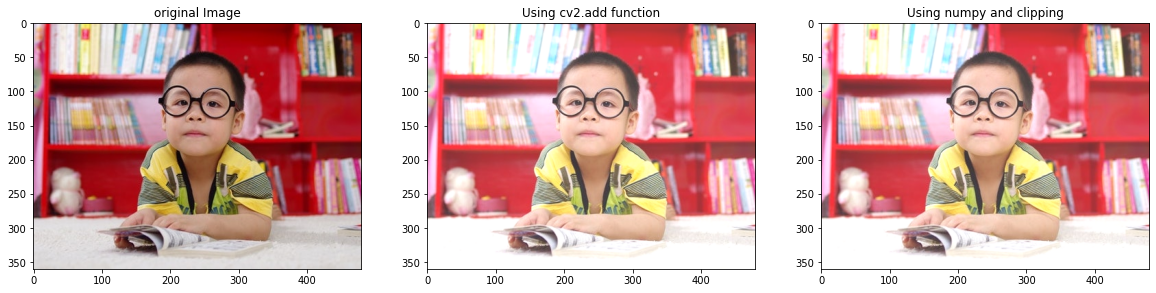

In [53]:
# Brightness with solution
brightnessOffset = 50
brightHighOpenCV = cv2.add(image,np.ones(image.shape,dtype='uint8')*brightnessOffset)

brightHighInt32 = np.int32(image) + brightnessOffset
brightHighInt32Clipped = np.clip(brightHighInt32,0,255)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image")
plt.subplot(132);plt.imshow(brightHighOpenCV[...,::-1]);plt.title("Using cv2.add function")
plt.subplot(133);plt.imshow(brightHighInt32Clipped[...,::-1]);plt.title("Using numpy and clipping")

Text(0.5, 1.0, 'Using int->float->int and clipping')

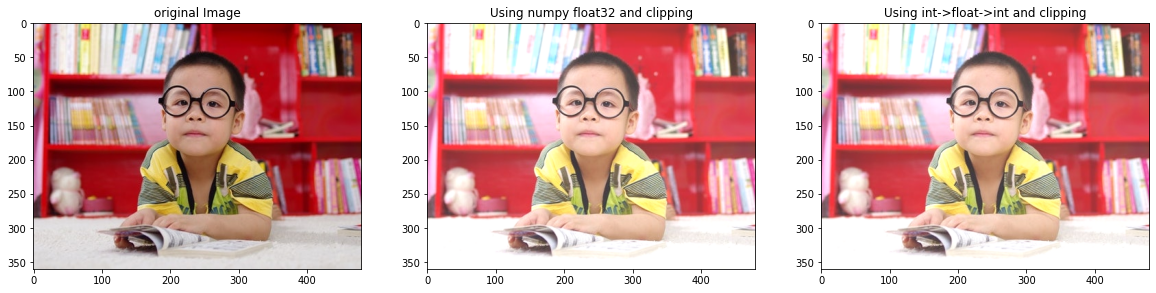

In [52]:
brightHighFloat32 = np.float32(image) + brightnessOffset
brightHighFloat32NormalizedClipped = np.clip(brightHighFloat32/255,0,1)
brightHighFloat32ClippedUint8 = np.uint8(brightHighFloat32NormalizedClipped*255)

plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(image[...,::-1]);plt.title("original Image")
plt.subplot(132);plt.imshow(brightHighFloat32NormalizedClipped[...,::-1]);plt.title("Using numpy float32 and clipping")
plt.subplot(133);plt.imshow(brightHighFloat32ClippedUint8[...,::-1]);plt.title("Using int->float->int and clipping")